# Udacity Data Analyst Nanodegree

## Project No.1

## Exploring Weather Trends

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

The project was done in python using JupyterLab enviroment.

 ### **Step No.1: Importing Useful Libraries**

In [2]:
import numpy as np 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

 ### **Step No.2: Importing the required CSV files into pandas dataframe**
 
 Notice: this csv files were extracted using SQL statements from udacity workspace
 
 This SQL statements used was: 
 
 **#to find the required city name**
 
 1- SELECT * FROM city_list 
 
 **#extract the nearest city's temprature data**
 
 2- SELECT year, avg_temp FROM city_data WHERE city = 'Riyadh' 
 
 **#extract global temprature data**
 
 3- SELECT year, avg_temp FROM global_data 

In [3]:
df_mycity = pd.read_csv('mycity_data.csv')
df_global = pd.read_csv('global_data.csv')

df_mycity.head()

,year,city,country,avg_temp,5years_mv
0,1843,Riyadh,Saudi Arabia,24.74,NaN
1,1844,Riyadh,Saudi Arabia,15.45,NaN
2,1845,Riyadh,Saudi Arabia,20.82,NaN
3,1846,Riyadh,Saudi Arabia,NaN,NaN
4,1847,Riyadh,Saudi Arabia,NaN,20.336667


 ### **Step No.3: Checking Null values and removing them**

In [4]:
#Counting Nan Values

print(df_mycity['avg_temp'].isnull().sum(axis = 0))
print(df_global['avg_temp'].isnull().sum(axis = 0))

2
0


In [40]:
#Dropping Nan Values as they don't have signficant contribution to the data
df_mycity.dropna(axis=0, inplace=True)

 ### **Step No.4: Removing years from global data that doesn't match the chosen city**

In [39]:
#dropping range of years from global data that doesn't match with current city data
df_global.drop(df_global.loc[0:97].index, inplace=True)

**Notice:** to avoid above steps, you can modify the sql query to include the follwing: 
        
SELECT city_data.year,
city_data.avg_temp as city_temp,
global_data.avg_temp as global_temp
FROM city_data, global_data
WHERE city_data.year = global_data.year
AND NOT city_data.avg_temp is NULL
AND city_data.city = 'Riyadh'

 ### **Step No.5: visualizing data using a line plot without using moving average**

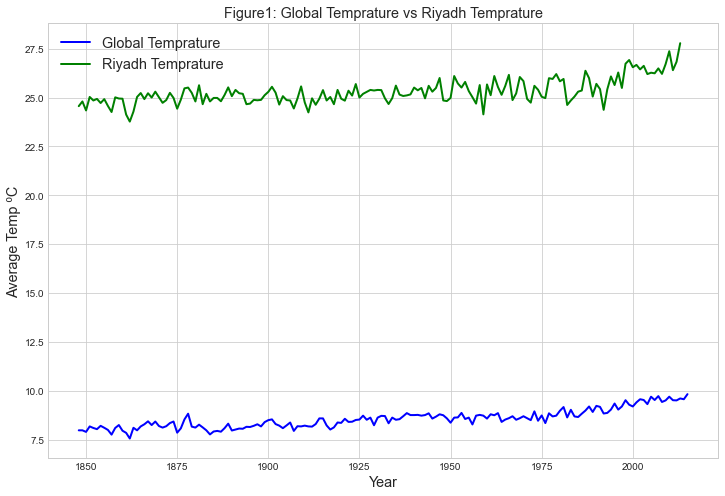

In [37]:
#visulizing data using a line graph with year as the x axis and temprature average as y axis

plt.figure(figsize=(12,8))
plt.plot('year', 'avg_temp', data=df_global, markerfacecolor='blue', markersize=8, color='blue', linewidth=2, label = 'Global Temprature')
plt.plot('year', 'avg_temp', data = df_mycity, markersize=8, color='green', linewidth=2, label = 'Riyadh Temprature')
plt.title("Figure1: Global Temprature vs Riyadh Temprature", fontsize='x-large')
plt.xlabel("Year", fontsize='x-large')
plt.ylabel("Average Temp ºC", fontsize='x-large')
plt.legend(fontsize='x-large')


#### Those figures looks too volatile which makes it harder to extract useful observations and insights. 

 ### **Step No.6: visualizing data using a line plot with moving temprature average**
 
#### By using the moving average, we can both smooth out the yearly volatility and allow you to observe the long term trend.

#### In this project, we calculated the moving average over **5 years** range. An extra column called 5years_mv was added to both CSV files (global_data, mycity_data) which contains the results of the moving average temprature over **5 years** using the AVERAGE() function (Refer to the below screenshot).

![image](MV.png)

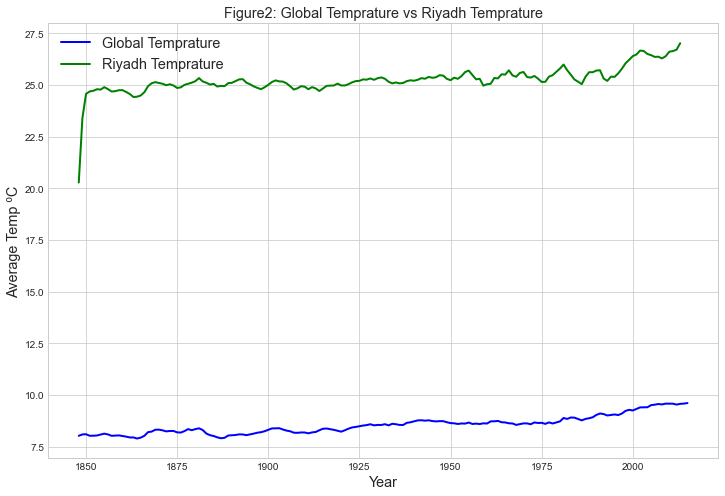

In [36]:
plt.figure(figsize=(12,8))
plt.plot('year', '5years_mv', data=df_global, markerfacecolor='blue', markersize=8, color='blue', linewidth=2, label = 'Global Temprature')
plt.plot('year', '5years_mv', data = df_mycity, markersize=8, color='green', linewidth=2, label = 'Riyadh Temprature')
plt.title("Figure2: Global Temprature vs Riyadh Temprature", fontsize='x-large')
plt.xlabel("Year", fontsize='x-large')
plt.ylabel("Average Temp ºC", fontsize='x-large')
plt.legend(fontsize='x-large')

#### The graph with the moving average temprature (Figure 2) looks much smoother than the previous figure (Figure 1).

 ### **Step No.7: Make Observation**

#### *Observation no.1: In general, the weather in Riyadh city looks hotter than the average global temprature. As we can see from the Figure 2, the temprature in Riyadh mostly falls around 25-26 (ºC) where the global temperature almost falls around 7.5-9.5 (ºC)*

#### *Observation no.2: The weather temprature in Riyadh city shows more variation by year than the global weather*.

#### *Observation no.3: by looking at the curve of the line in both figures, we can see that temprature is getting hotter as we move along x axis. In another words, the world temprature (both globally and in Riyadh) tends to get hotter over the time.*

#### *Observation no.4: global temprature has witnessed sudden huge drop in temprature around the year 1880, but from then on, it started to move tward increased temprature until it reached a 9.75 (ºC) on 2010. On the other hand, Riydh city only have started to show signficant increase in temprature from around the year 1985 and above. The reason behind this sudden increase in temprature is unknown and needs to be further explored...*

#### *Observation no.5: Riyadh have witnessed an anomly on the weather temprature around the year 1850 where the degree reached 15(ºC). This temprature is considered the cooldest temprature the Riyadh city has ever reached according to the given dataset*